# Capstone Module 3: Machine Learning
## Data: Bank Marketing Campaign
### Created By: Gregorius Aldo Primantono

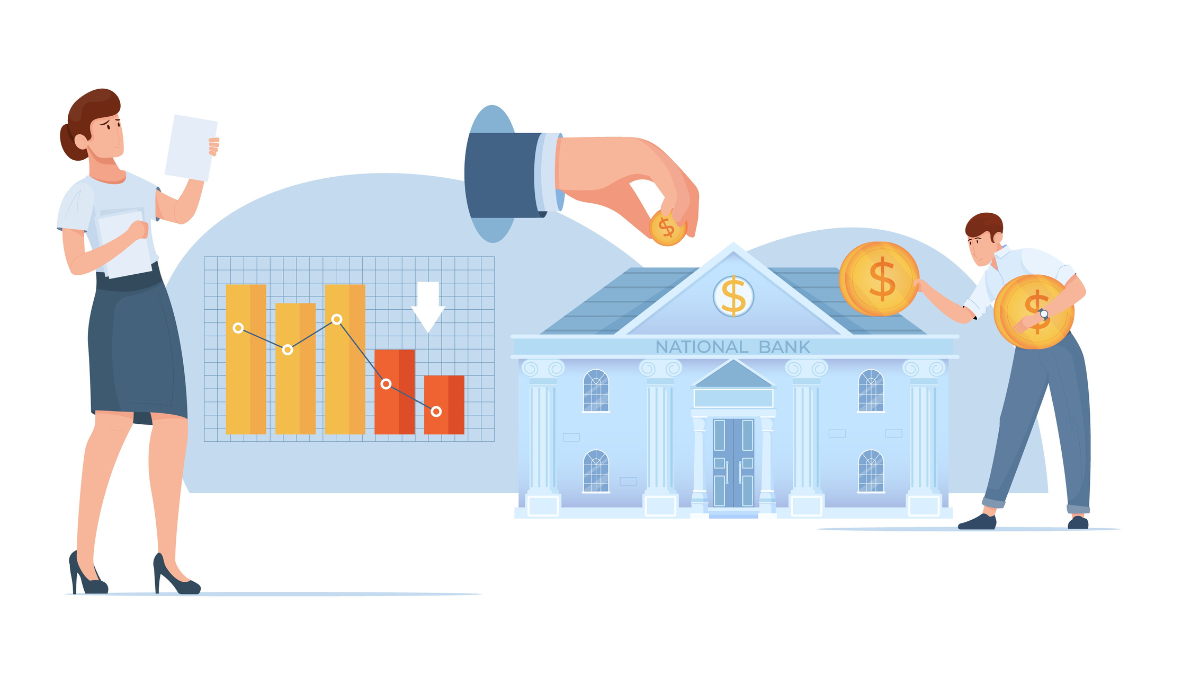

## Context Business
Seiring dengan meningkatnya variasi produk keuangan yang tersedia di masyarakat, Deposito Berjangka menjadi salah satu produk yang populer. Deposito Berjangka adalah produk di mana nasabah menyetorkan sejumlah uang ke bank atau lembaga keuangan dengan kesepakatan bahwa uang tersebut tidak dapat ditarik sebelum jangka waktu tertentu. Sebagai imbalannya, nasabah akan menerima bunga tetap berdasarkan jumlah uang yang disetorkan.

Bank dan lembaga keuangan lainnya harus berupaya keras untuk menarik dan mempertahankan nasabah, terutama dalam menghadapi persaingan yang ketat. Salah satu metode untuk menarik nasabah baru adalah melalui kampanye pemasaran yang efektif.

| Metric           | Description                                                   |
|------------------|---------------------------------------------------------------|
| Accuracy         | Persentase prediksi yang benar dari total prediksi.           |
| Precision        | Proporsi prediksi positif yang benar dari semua prediksi positif. |
| Recall (Sensitivity) | Proporsi prediksi positif yang benar dari semua kasus positif sebenarnya. |
| F1-Score         | Harmonik rata-rata dari precision dan recall.                 |
| ROC AUC          | Luas di bawah kurva ROC yang menunjukkan trade-off antara TPR dan FPR. |
| Confusion Matrix | Matriks yang menunjukkan perbandingan antara prediksi dan label sebenarnya dalam bentuk True Positive, True Negative, False Positive, dan False Negative. |
| Log Loss         | Ukuran ketidakakuratan dari probabilitas prediksi model.      |

| Metric           | Description                                                   |
|------------------|---------------------------------------------------------------|
| True Positive (TP) | Kasus positif yang diprediksi positif oleh model.           |
| False Positive (FP) | Kasus negatif yang diprediksi positif oleh model.           |
| True Negative (TN) | Kasus negatif yang diprediksi negatif oleh model.           |
| False Negative (FN) | Kasus positif yang diprediksi negatif oleh model.           |

Penggunaan F1 score dalam konteks dataset dan label akan membantu memastikan bahwa model prediksi tidak hanya akurat secara keseluruhan tetapi juga efektif dalam mendukung tujuan strategis perusahaan, yaitu meningkatkan akuisisi nasabah untuk produk Deposito Berjangka dengan biaya yang optimal. F1 score memberikan pemahaman yang holistik tentang kinerja model dan kontribusi masing-masing kriteria dalam mempengaruhi keputusan prediksi, yang sangat penting dalam pengambilan keputusan pemasaran yang berbasis data.

**Target:**

- **0** : Tidak membuka Deposito Berjangka
- **1** : Membuka Deposito Berjangka

## Problem Statement
1. Bagaimana cara mengidentifikasi calon nasabah yang diprediksi akan membuka Deposito Berjangka?
2. Metode apa yang dapat digunakan untuk memfokuskan kampanye pemasaran dan informasi produk hanya kepada calon nasabah yang diprediksi tertarik?
3. Bagaimana cara menekan biaya pemasaran dan meningkatkan efektivitas kampanye melalui prediksi yang akurat?
4. Informasi atau kriteria apa yang menentukan nasabah berpotensi tertarik membuka Deposito Berjangka?
5. Bagaimana cara mengembangkan strategi pemasaran yang lebih tepat sasaran di masa depan berdasarkan kriteria nasabah potensial?
## Goals
1. Mengidentifikasi calon nasabah yang diprediksi akan membuka Deposito Berjangka.
2. Memfokuskan kampanye pemasaran dan informasi produk hanya kepada calon nasabah yang diprediksi tertarik.
3. Menekan biaya pemasaran dan meningkatkan efektivitas kampanye melalui prediksi yang akurat.
4. Memperoleh informasi tentang kriteria nasabah yang berpotensi tertarik membuka Deposito Berjangka.
5. Mengembangkan strategi pemasaran yang lebih tepat sasaran di masa depan berdasarkan kriteria nasabah potensial.

## Import Library

In [274]:
# untuk manipulasi data, analisis, dan visualisasi.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# untuk encoding, scaling, imputing, dan transformasi data.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA

# untuk split data, memilih model, cross-validation, dan evaluasi model.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# untuk membangun model dan menangani ketidakseimbangan data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy import stats

## Load Data

In [275]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
7,36,technician,911,yes,yes,cellular,may,2,21,failure,yes
8,35,management,805,no,no,cellular,sep,1,-1,unknown,no
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,no


In [276]:
# Konversi nilai 'yes' dan 'no' pada kolom 'deposit' menjadi bentuk numerik dengan np.where
df['deposit'] = np.where(df['deposit'] == 'yes', 1, 0)
df.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,0
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1
8,35,management,805,no,no,cellular,sep,1,-1,unknown,0
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,0


## Penjelasan Kolom:

| Kolom                                    | Deskripsi                                                                                 |
|------------------------------------------|-------------------------------------------------------------------------------------------|
| **age (usia)**                           | Usia pelanggan.                                                                           |
| **job (pekerjaan)**                      | Jenis pekerjaan pelanggan.                                                                |
| **balance (saldo)**                      | Saldo rekening bank pelanggan.                                                            |
| **housing (rumah)**                      | Apakah pelanggan memiliki rumah atau tidak (yes = ya, no = tidak).                        |
| **loan (pinjaman)**                      | Apakah pelanggan memiliki pinjaman atau tidak (yes = ya, no = tidak).                     |
| **contact (kontak)**                     | Jenis komunikasi yang digunakan untuk menghubungi pelanggan (misalnya, melalui telepon atau seluler). |
| **month (bulan)**                        | Bulan terakhir pelanggan dihubungi.                                                       |
| **campaign (kampanye)**                  | Jumlah kontak yang dilakukan selama kampanye ini untuk pelanggan tersebut.                |
| **pdays (hari)**                         | Jumlah hari setelah pelanggan dihubungi dari kampanye sebelumnya. Nilai -1 menunjukkan bahwa pelanggan tidak dihubungi dalam kampanye sebelumnya. |
| **poutcome (hasil kampanye sebelumnya)** | Hasil dari kampanye pemasaran sebelumnya (misalnya, berhasil atau tidak berhasil).        |
| **deposit (deposito)**                   | Apakah pelanggan melakukan deposito atau tidak (yes = ya, no = tidak).                    |

# Informasi Feature/Data Understanding

### Spliting dataset menjadi **df_train** dan **df_test**

In [277]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['deposit'])

Melakukan split setelah load dataset untuk menghindari Data Leakage, memastikan bahwa data pengujian (df_test) tidak terlibat dalam proses pra-pemrosesan atau pengaturan model (df_train) membantu mencegah kebocoran informasi dari data pengujian ke dalam data pelatihan, yang dapat menyebabkan evaluasi yang bias.

### Melihat tipe data tiap kolom

In [278]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6250 entries, 1459 to 2303
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       6250 non-null   int64 
 1   job       6250 non-null   object
 2   balance   6250 non-null   int64 
 3   housing   6250 non-null   object
 4   loan      6250 non-null   object
 5   contact   6250 non-null   object
 6   month     6250 non-null   object
 7   campaign  6250 non-null   int64 
 8   pdays     6250 non-null   int64 
 9   poutcome  6250 non-null   object
 10  deposit   6250 non-null   int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 561.5+ KB


Dataset memiliki:
- 4 kolom integer
- 6 kolom string/object -> sebelum melakukan nilai 'yes' dan 'no' pada kolom 'deposit' menjadi bentuk numerik dengan np.where

### Melihat sebaran data tiap kolom

In [279]:
df_train.describe()

,age,balance,campaign,pdays,deposit
count,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,41.224800,1507.599360,2.513760,51.525120,0.477600
std,11.899612,3028.937658,2.713778,108.577223,0.499538
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,129.250000,1.000000,-1.000000,0.000000
50%,39.000000,556.000000,2.000000,-1.000000,0.000000
75%,49.000000,1693.000000,3.000000,48.000000,1.000000
max,95.000000,52587.000000,63.000000,854.000000,1.000000


In [280]:
df_train.shape

(6250, 11)

### Melihat baris yang duplikat

In [281]:
# Mengidentifikasi baris duplikat
duplicate_rows = df_train[df_train.duplicated(keep=False)]

# Mengurutkan baris duplikat berdasarkan kolom 'age' dan 'job'
duplicate_rows_sorted = duplicate_rows.sort_values(by=['age', 'job'])

print(f"Jumlah baris duplikat: {duplicate_rows_sorted.duplicated().sum()}")

# Menampilkan baris duplikat yang sudah diurutkan
pd.DataFrame(duplicate_rows_sorted)

Jumlah baris duplikat: 5


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2486,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,1
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,1
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,0
330,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,0
3073,41,management,0,no,no,cellular,aug,2,-1,unknown,0
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,0
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,0
4935,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,0
1948,60,management,0,no,no,cellular,aug,3,-1,unknown,1
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,1


Mendeteksi duplikat pada dataset, yang kemudian akan dihapus pada tahap data cleaning, untuk menghindari data yang tidak konsisten yang dapat berpengaruh pada statistik deskriptif maupun hasil model. 

### Pengecekan Missing Value

In [282]:
missing_values = df_train.isnull().sum()

# Menampilkan hasil pengecekan missing value
pd.DataFrame({'Data Kosong Pada Setiap Kolom' : missing_values})

,Data Kosong Pada Setiap Kolom
age,0
job,0
balance,0
housing,0
loan,0
contact,0
month,0
campaign,0
pdays,0
poutcome,0


Mendeteksi nilai null/nan pada dataset, yang kemudian akan dihapus pada tahap data cleaning, untuk menghindari kehilangan informasi, konsistensi analisis, dan performa model.

### Menampilkan jumlah nilai distinct (unik) di setiap kolom

In [283]:
distinct_values = df_train.nunique()

pd.DataFrame({'Unique Data Setiap Kolom' : distinct_values})

,Unique Data Setiap Kolom
age,75
job,12
balance,2800
housing,2
loan,2
contact,3
month,12
campaign,30
pdays,399
poutcome,4


### Menampilkan nilai unik di setiap kolom

In [284]:
all_unique_values_list = []

# Menambahkan nilai unik ke dalam DataFrame
for col in df_train.columns:
    unique_values = df_train[col].unique()
    unique_values_str = ', '.join(map(str, unique_values))
    unique_values_count = len(unique_values)
    all_unique_values_list.append({"Column": col, "Unique Values": unique_values_str, "Count": unique_values_count})

# Membuat DataFrame dari list
all_unique_values_df_train = pd.DataFrame(all_unique_values_list)

# Mengatur tampilan untuk memastikan semua nilai terlihat
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Menampilkan DataFrame
pd.DataFrame(all_unique_values_df_train)

Column  \
0        age   
1        job   
2    balance   
3    housing   
4       loan   
5    contact   
6      month   
7   campaign   
8      pdays   
9   poutcome   
10   deposit   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Kolom Numerikal

### Visualisasi sebaran data kolom numerik

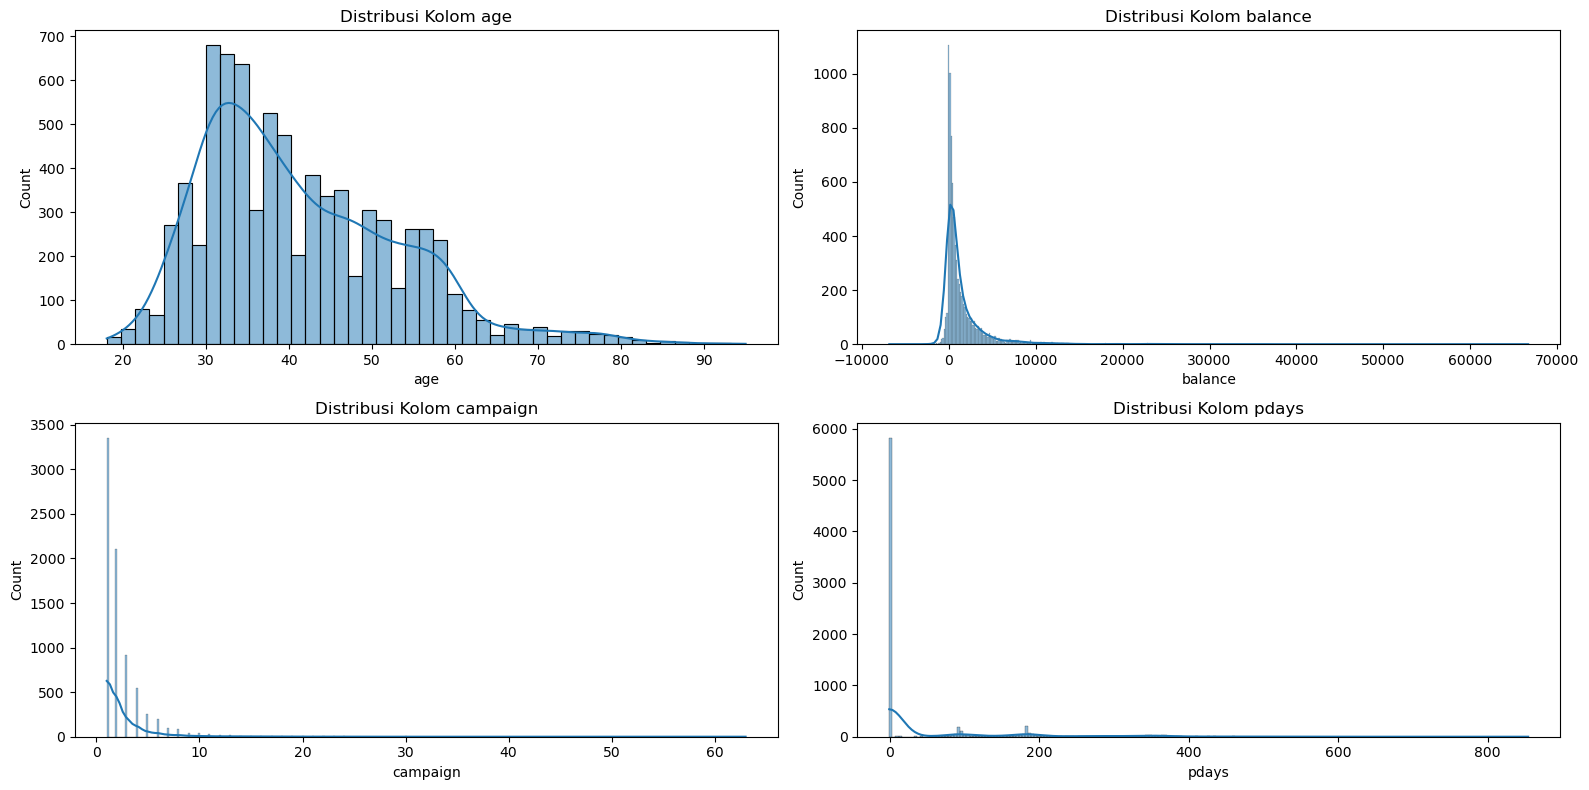

In [285]:
# Menentukan kolom numerik
numerical_cols = ['age', 'balance', 'campaign', 'pdays']

# Plot histogram untuk mengecek distribusi
plt.figure(figsize=(16, 8))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi Kolom {col}')

plt.tight_layout()
plt.show()

### Visualisasi outlier

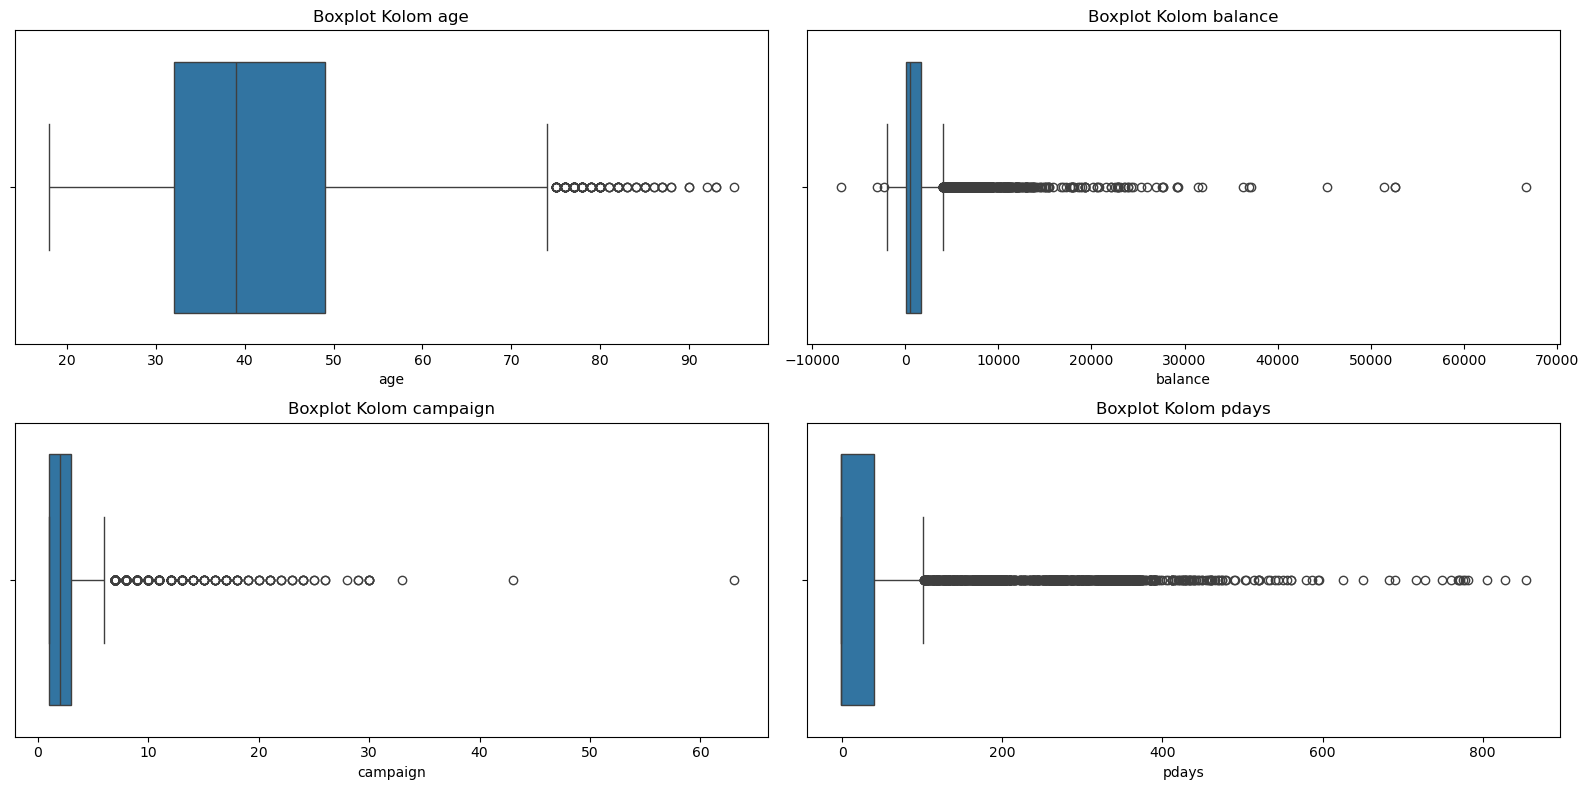

In [286]:
# Plot boxplot untuk mengecek outlier
plt.figure(figsize=(16, 8))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot Kolom {col}')

plt.tight_layout()
plt.show()

### Pengecekan Outlier dengan IQR

In [287]:
# Fungsi untuk menghitung jumlah dan persentase outlier
def detect_outliers(df_train, col):
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_percentage = (outliers_count / df_train.shape[0]) * 100
    return outliers_count, f'{outliers_percentage:.2f}%'

# Menghitung dan menampilkan jumlah dan persentase outlier untuk setiap kolom numerik
outlier_summary = {}
for col in numerical_cols:
    outlier_count, outlier_percentage = detect_outliers(df_train, col)
    outlier_summary[col] = {'Jumlah Outlier': outlier_count, 'Persentase Outlier': outlier_percentage}

# Menampilkan hasil
outlier_summary_df = pd.DataFrame(outlier_summary).T
pd.DataFrame(outlier_summary_df)

,Jumlah Outlier,Persentase Outlier
age,96,1.54%
balance,578,9.25%
campaign,341,5.46%
pdays,1087,17.39%


### Uji Multikolinearitas

In [288]:
# Menghitung matriks korelasi antara fitur numerik
numerical_cols_corr = ['age', 'balance', 'campaign', 'pdays', 'deposit']
correlation_matrix = df_train[numerical_cols_corr].corr(method = 'spearman')

# Menampilkan matriks korelasi
print("Matriks Korelasi Antara Fitur Numerik:")
pd.DataFrame(correlation_matrix)

Matriks Korelasi Antara Fitur Numerik:


,age,balance,campaign,pdays,deposit
age,1.000000,0.089671,0.025273,0.009925,0.003312
balance,0.089671,1.000000,-0.022990,0.094270,0.151021
campaign,0.025273,-0.022990,1.000000,-0.132056,-0.122151
pdays,0.009925,0.094270,-0.132056,1.000000,0.210163
deposit,0.003312,0.151021,-0.122151,0.210163,1.000000


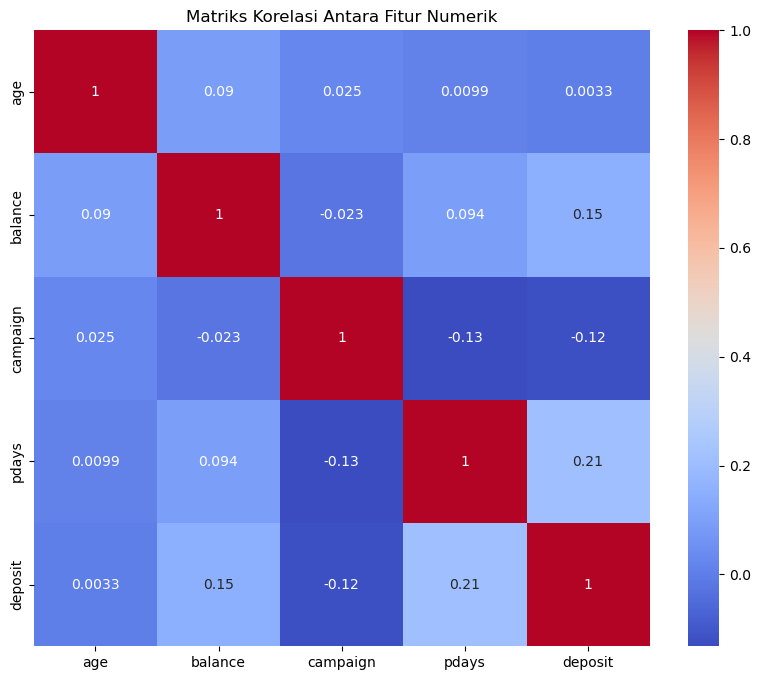

In [289]:
# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Matriks Korelasi Antara Fitur Numerik")
plt.show()

**Heatmap Threshold:**
- Tinggi: Korelasi di atas 0.7 (positif) atau di bawah -0.7 (negatif).
- Medium: Korelasi antara 0.3 dan 0.7 (positif atau negatif).
- Rendah: Korelasi di bawah 0.3 (positif atau negatif).

Berdasarkan threshold tersebut, dapat disimpulkan bahwa tidak ada kolom numerik yang berkorelasi tinggi terhadap kolom **deposit**.

In [290]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Mengambil fitur numerik
X = df_train[numerical_cols_corr].copy()

# Menghitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Menampilkan hasil VIF
pd.DataFrame(vif_data)

,Feature,VIF
0,age,3.004536
1,balance,1.265071
2,campaign,1.763713
3,pdays,1.247284
4,deposit,1.906715


**Nilai VIF lebih rendah dari threshold 5** yang menunjukan **tidak ada permasalahan multikolinearitas** pada data.

### Uji Normalitas

In [291]:
# Daftar kolom numerik dari df_train
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns

# Loop melalui setiap fitur numerik dan lakukan uji normalitas
for feature in numeric_features:
    k2, p = stats.normaltest(df_train[feature])
    print(f'P-value untuk uji normalitas {feature}: {p}')

P-value untuk uji normalitas age: 1.9588936704670039e-146
P-value untuk uji normalitas balance: 0.0
P-value untuk uji normalitas campaign: 0.0
P-value untuk uji normalitas pdays: 0.0


Seluruh kolom numerik tidak berdistribus normal dikarenakan nilai P-Value dibawah 0.05

## Kolom Kategorikal

In [292]:
# Mengambil kolom kategorik
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Membuat DataFrame untuk menyimpan nilai unik
unique_values_list = []

# Menambahkan nilai unik ke dalam DataFrame
for col in categorical_cols:
    unique_values = df_train[col].unique()
    unique_values_str = ', '.join(map(str, unique_values))
    unique_values_count = len(unique_values)
    unique_values_list.append({"Column": col, "Unique Values": unique_values_str, "Count": unique_values_count})

# Membuat DataFrame dari list
unique_values_df_train = pd.DataFrame(unique_values_list)

# Mengatur tampilan untuk memastikan semua nilai terlihat
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Menampilkan DataFrame
pd.DataFrame(unique_values_df_train)

,Column,Unique Values,Count
0,job,"management, technician, admin., services, entrepreneur, student, blue-collar, retired, housemaid, self-employed, unknown, unemployed",12
1,housing,"yes, no",2
2,loan,"no, yes",2
3,contact,"cellular, unknown, telephone",3
4,month,"may, apr, sep, jun, nov, aug, jul, oct, dec, mar, jan, feb",12
5,poutcome,"failure, unknown, other, success",4


## Melihat Kardinalitas

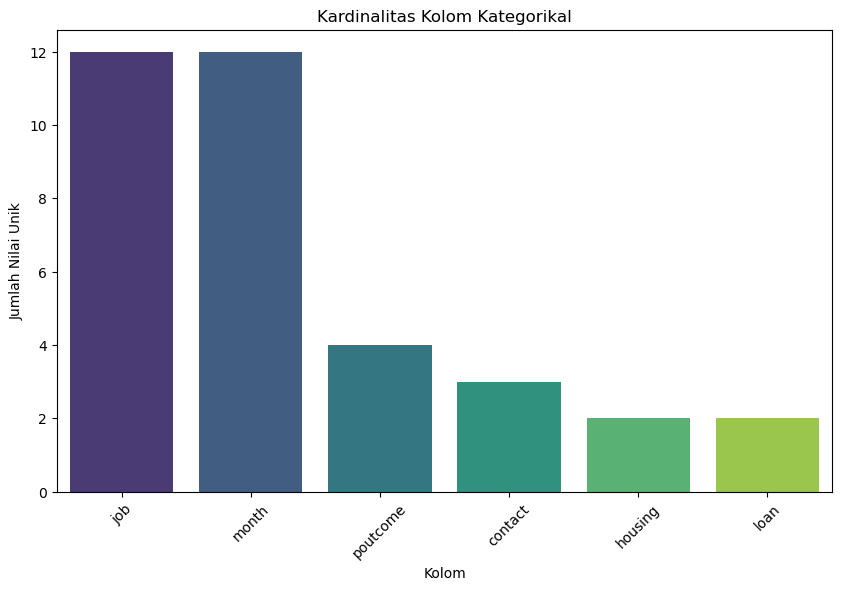

In [293]:
# Menghitung kardinalitas
cardinality = {col: df_train[col].nunique() for col in categorical_cols}

# Membuat DataFrame untuk visualisasi
cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Column', 'Unique Values'])

# Mengurutkan secara menurun
cardinality_df = cardinality_df.sort_values(by='Unique Values', ascending=False).reset_index(drop=True)

# Menambahkan kolom penomoran
cardinality_df['No.'] = cardinality_df.index + 1

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=cardinality_df, x='No.', y='Unique Values', palette='viridis')
plt.title('Kardinalitas Kolom Kategorikal')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Nilai Unik')
plt.xticks(ticks=range(len(cardinality_df)), labels=cardinality_df['Column'], rotation=45)
plt.show()

- **Low Cardinality (2-4 unique values)**

- **Medium Cardinality (5-15 unique values):**

C:\Users\grega\AppData\Local\Temp\ipykernel_15632\3126427473.py:16: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\grega\AppData\Local\Temp\ipykernel_15632\3126427473.py:16: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\grega\AppData\Local\Temp\ipykernel_15632\3126427473.py:16: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\grega\AppData\Local\Temp\ipykernel_15632\3126427473.py:16: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\grega\AppData\Local\Temp\ipykernel_15632\3126427473.py:16: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


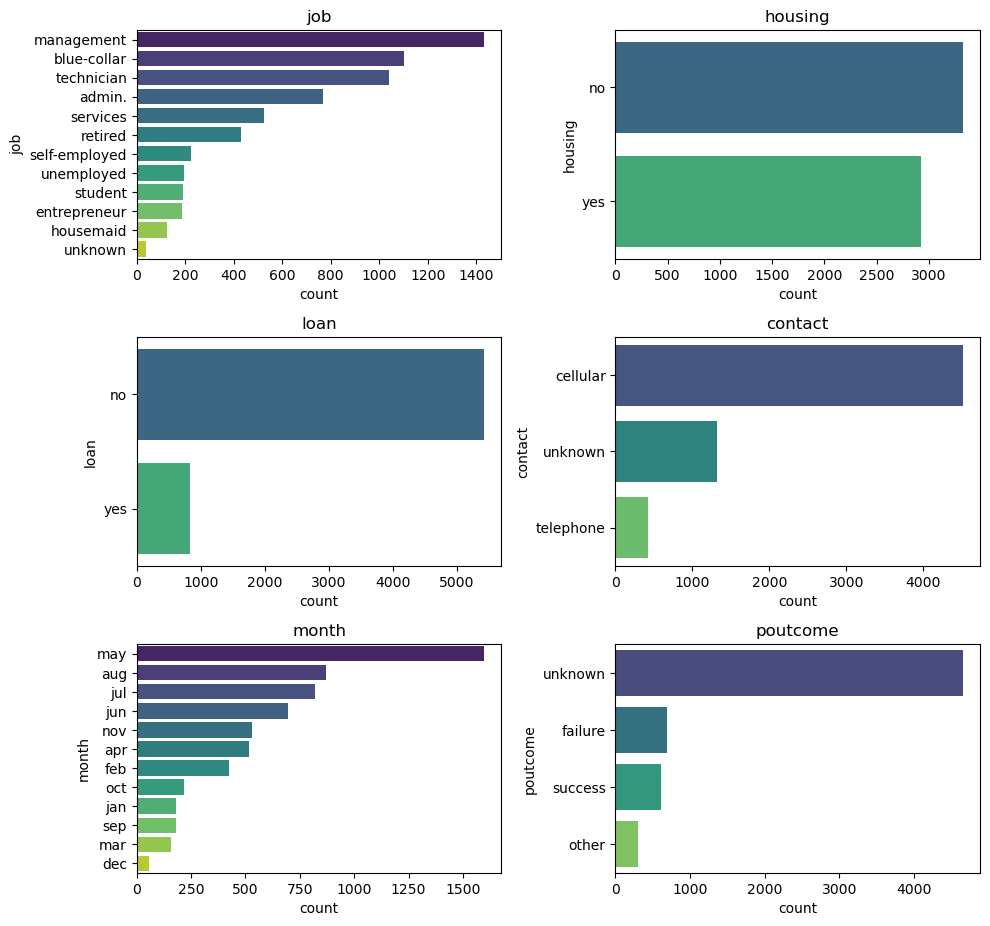

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

count = 0
fig = plt.figure(figsize=(10, 12))

# Looping untuk setiap kolom kategorikal dalam categorical_cols
for kolom in categorical_cols:
    count += 1
    plt.subplot(4, 2, count)  # Mengatur subplot dengan 4 baris dan 2 kolom
    sns.countplot(y=kolom, 
                  data=df_train,  # Menggunakan df_train untuk plot distribusi dalam train set
                  order=df_train[kolom].value_counts().sort_values(ascending=False).index, 
                  palette='viridis')  # Menggunakan skema warna viridis
    plt.title(kolom, fontsize=12)
    fig.tight_layout()

plt.show()

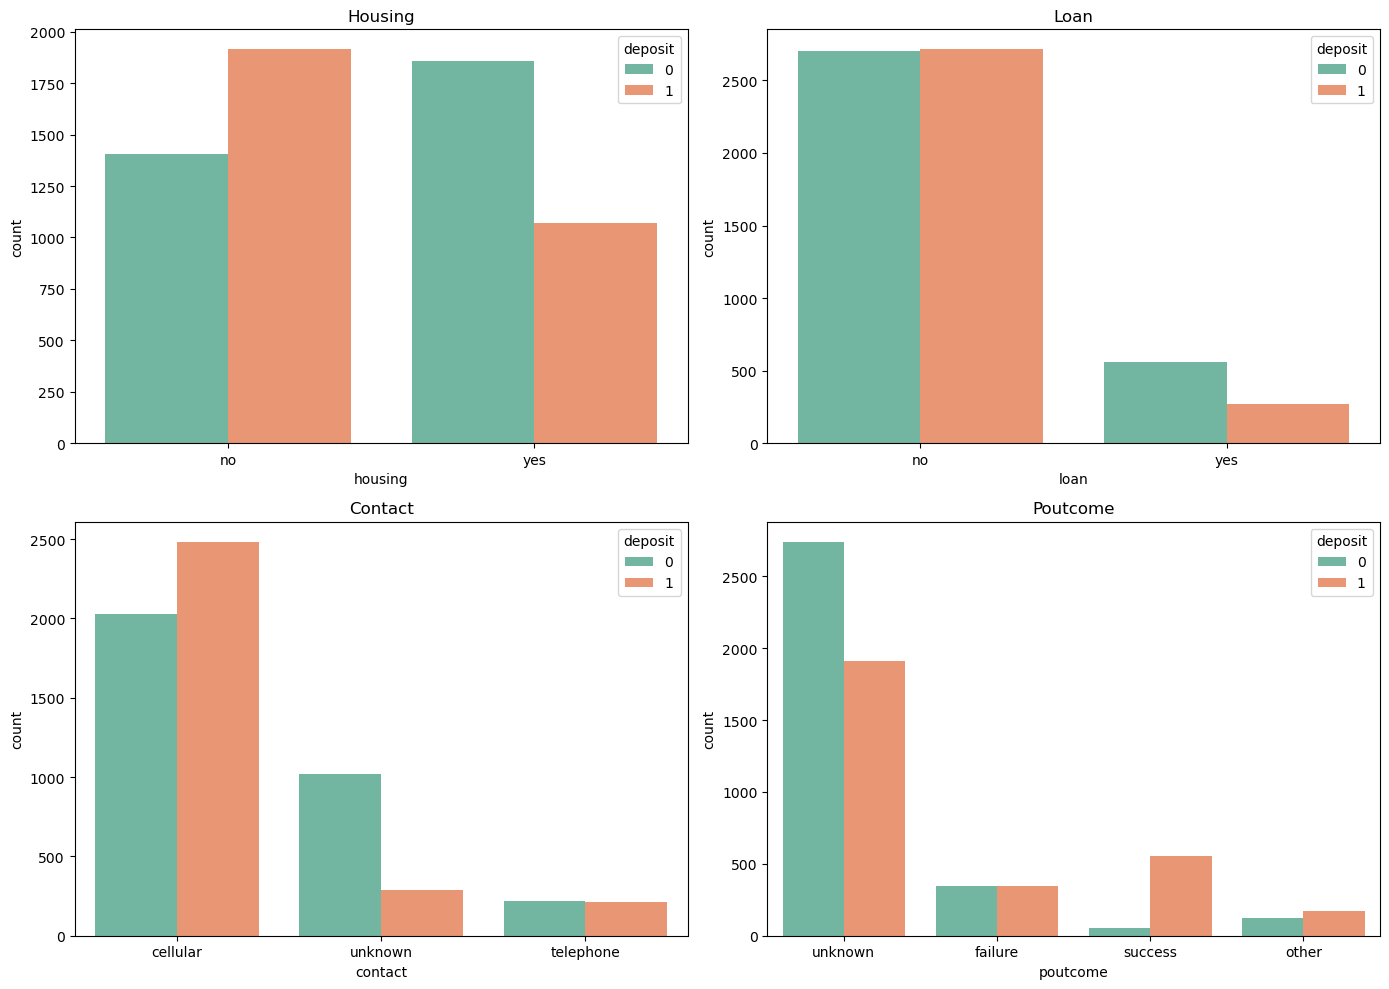

In [298]:
plt.figure(figsize=(14, 10))

plt.subplot(221)
sns.countplot(x=df_train['housing'], 
              data=df_train, 
              order=df_train['housing'].value_counts().sort_values(ascending=False).index, 
              hue='deposit',
              palette='Set2')  # Menggunakan palet warna 'Set2'
plt.title('Housing', fontsize=12)

plt.subplot(222)
sns.countplot(x=df_train['loan'], 
              data=df_train, 
              order=df_train['loan'].value_counts().sort_values(ascending=False).index, 
              hue='deposit',
              palette='Set2')  # Menggunakan palet warna 'Set2'
plt.title('Loan', fontsize=12)

plt.subplot(223)
sns.countplot(x=df_train['contact'], 
              data=df_train, 
              order=df_train['contact'].value_counts().sort_values(ascending=False).index, 
              hue='deposit',
              palette='Set2')  # Menggunakan palet warna 'Set2'
plt.title('Contact', fontsize=12)

plt.subplot(224)
sns.countplot(x=df_train['poutcome'], 
              data=df_train, 
              order=df_train['poutcome'].value_counts().sort_values(ascending=False).index, 
              hue='deposit',
              palette='Set2')  # Menggunakan palet warna 'Set2'
plt.title('Poutcome', fontsize=12)

plt.tight_layout()
plt.show()

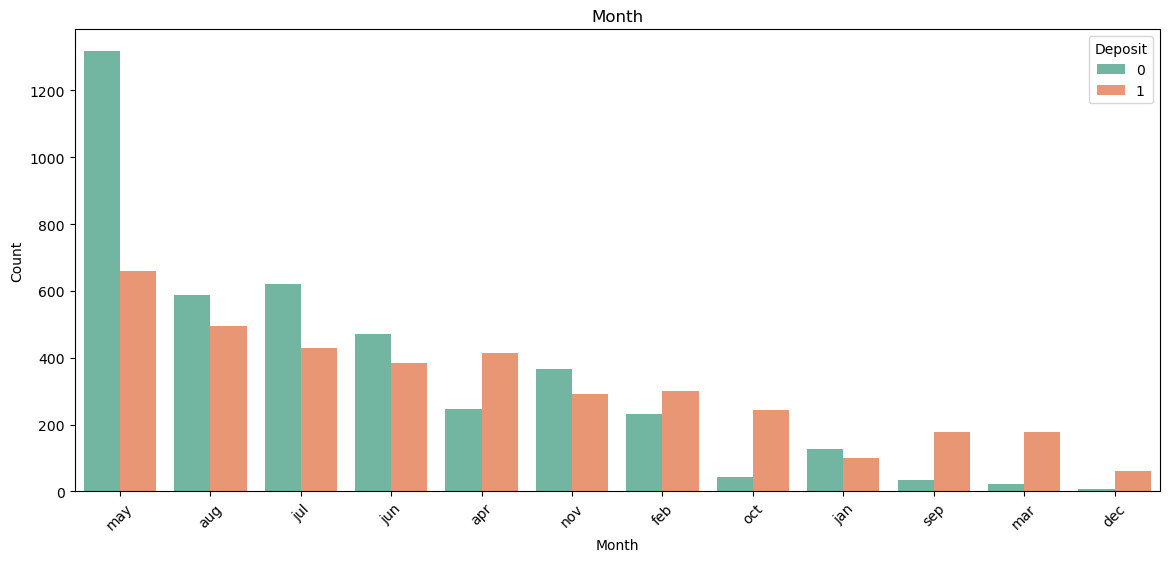

In [301]:
plt.figure(figsize=(14, 6))
sns.countplot(x=df['month'], data=df, order=df['month'].value_counts().sort_values(ascending=False).index, hue='deposit', palette='Set2')
plt.title('Month', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit', loc='upper right')
plt.show()

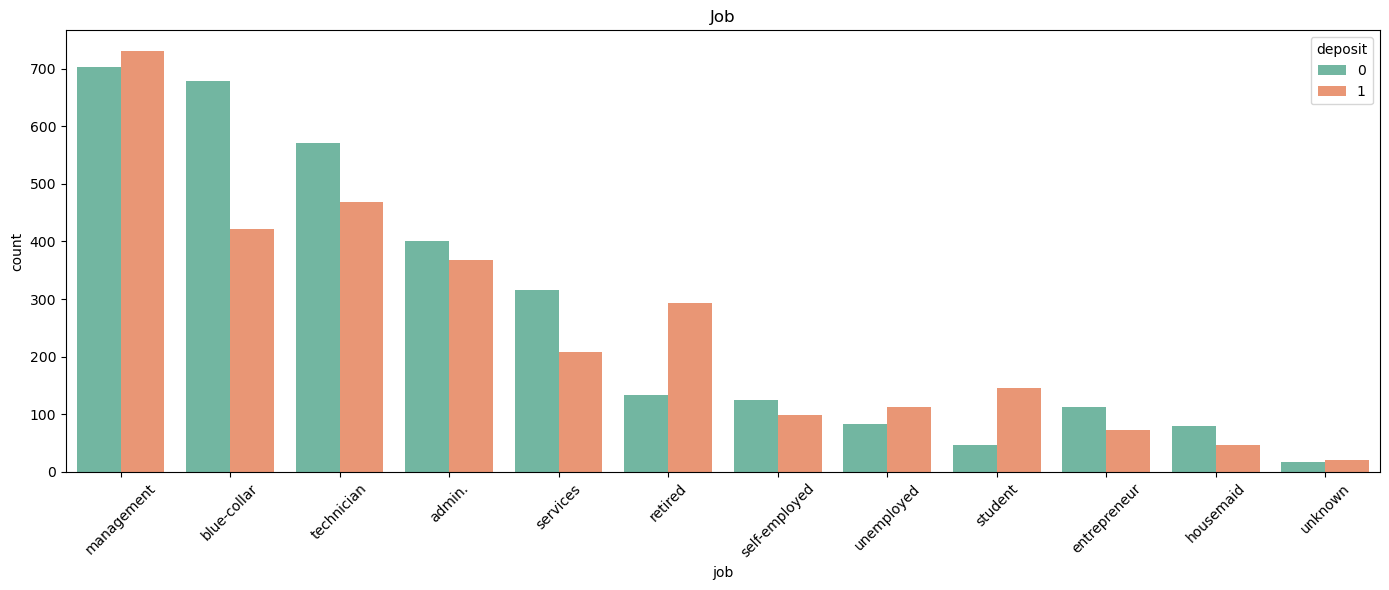

In [299]:
plt.figure(figsize=(14, 6))
sns.countplot(x=df_train['job'], 
              data=df_train, 
              order=df_train['job'].value_counts().sort_values(ascending=False).index, 
              hue='deposit',
              palette='Set2')  # Menggunakan palet warna 'Set2'
plt.title('Job', fontsize=12)
plt.xticks(rotation=45)  # Rotasi label sumbu x untuk meningkatkan kejelasan
plt.tight_layout()
plt.show()

**Informasi:** Terdapat nilai **unknown** pada kolom **job**, **contact** dan **poutcome**

In [217]:
# Fungsi untuk menghitung jumlah dan persentase
def calculate_value_counts_and_percentages(df_train, column):
    value_counts = df_train[column].value_counts()
    percentages = df_train[column].value_counts(normalize=True) * 100
    percentages = percentages.round(2).astype(str) + '%'
    result = pd.DataFrame({'Jumlah': value_counts, 'Persentase': percentages})
    return result

# Menghitung jumlah dan persentase pada kolom 'campaign'
job_stats = calculate_value_counts_and_percentages(df_train, 'job')
pd.DataFrame(job_stats)

,Jumlah,Persentase
job,,
management,1792,23.1%
blue-collar,1346,17.35%
technician,1291,16.64%
admin.,936,12.06%
services,658,8.48%
retired,540,6.96%
self-employed,280,3.61%
unemployed,249,3.21%
student,247,3.18%


In [218]:
# Menghitung jumlah dan persentase pada kolom 'campaign'
contact_stats = calculate_value_counts_and_percentages(df_train, 'contact')
pd.DataFrame(contact_stats)

,Jumlah,Persentase
contact,,
cellular,7223,93.09%
telephone,536,6.91%


In [219]:
# Menghitung jumlah dan persentase pada kolom 'poutcome'
poutcome_stats = calculate_value_counts_and_percentages(df_train, 'poutcome')
pd.DataFrame(poutcome_stats)

,Jumlah,Persentase
poutcome,,
not_contacted,5779,74.48%
failure,841,10.84%
success,754,9.72%
other,385,4.96%


## Data Cleaning & Imputation

### Melakukan drop duplicate

In [220]:
# Menghapus baris yang duplikat
df_train = df_train.drop_duplicates()

# Menampilkan jumlah baris setelah menghapus duplikat
print(f'Jumlah baris setelah menghapus duplikat: {df_train.duplicated().sum()}')

Jumlah baris setelah menghapus duplikat: 0


### Impute Outlier

In [212]:
# Fungsi untuk mendeteksi outliers menggunakan 1.5 IQR
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers), f'{len(outliers) / len(data) * 100:.2f}%'

# Mengimputasi outliers pada 'balance' dengan median
for col in ['balance']:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df_train[col].median()
    df_train[col] = np.where((df_train[col] < lower_bound) | (df_train[col] > upper_bound), median_value, df_train[col])

# Mengimputasi outliers pada 'pdays' dengan median (hanya upper bound)
for col in ['pdays']:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    median_value = df_train[col].median()
    df_train[col] = np.where((df_train[col] > upper_bound), median_value, df_train[col])

# Menghitung jumlah dan persentase outliers setelah imputasi untuk setiap kolom numerik
outlier_summary = {}
for col in ['age', 'balance', 'campaign', 'pdays']:
    outlier_count, outlier_percentage = detect_outliers(df_train, col)
    outlier_summary[col] = {'Jumlah Outlier': outlier_count, 'Persentase Outlier': outlier_percentage}

# Menampilkan hasil dalam urutan yang ditentukan
outlier_summary_df = pd.DataFrame(outlier_summary).T
outlier_summary_df = outlier_summary_df.loc[['age', 'balance', 'campaign', 'pdays']]
pd.DataFrame(outlier_summary_df)

,Jumlah Outlier,Persentase Outlier
age,96,1.54%
balance,478,7.65%
campaign,341,5.46%
pdays,520,8.33%


### Treatment untuk nilai unknown pada kolom **job**, **contact** dan **poutcome**

- Melakukan drop pada nilai unknown kolom job, dikarenakan tidak ada penjelasan mengenai nilai tersebut dan persentasenya yang sangat kecil yaitu 0.62%

In [221]:
# Menghapus baris dengan nilai 'unknown' pada kolom 'job'
df_train = df.drop(df[df['job'] == 'unknown'].index)
pd.DataFrame(job_stats)

,Jumlah,Persentase
job,,
management,1792,23.1%
blue-collar,1346,17.35%
technician,1291,16.64%
admin.,936,12.06%
services,658,8.48%
retired,540,6.96%
self-employed,280,3.61%
unemployed,249,3.21%
student,247,3.18%


- Melakukan impute pada nilai unknown kolom contact dengan menggunakan modus

In [222]:
# Mengimputasi nilai 'unknown' pada kolom 'contact' dengan modus
mode_contact = df_train['contact'].mode()[0]
df_train['contact'] = df_train['contact'].replace('unknown', mode_contact)

pd.DataFrame(contact_stats)

,Jumlah,Persentase
contact,,
cellular,7223,93.09%
telephone,536,6.91%


- Treatment unknown pada kolom pdays:

In [223]:
filtered_df = df_train[(df_train['poutcome'] != 'unknown') & (df_train['pdays'] == -1)]
pd.DataFrame(filtered_df[['poutcome', 'pdays']])

,poutcome,pdays


menunjukan bahwa poutcome yang unknown merupakan pelanggan yang tidak dihubungi dalam kampanye sebelumnya (pdays = -1)

In [224]:
# Mengubah nilai "unknown" menjadi "not_contacted" pada kolom "poutcome"
df_train['poutcome'] = df_train['poutcome'].replace('unknown', 'not_contacted')
pd.DataFrame(poutcome_stats)

,Jumlah,Persentase
poutcome,,
not_contacted,5779,74.48%
failure,841,10.84%
success,754,9.72%
other,385,4.96%


Melakukan perubahan nama unknown menjadi not_contacted pada kolom poutcome 

### Mengecek distribusi kelas target

Jumlah kelas:
deposit
0    4053
1    3706
Name: count, dtype: int64

Persentase kelas:
deposit
0    52.236113
1    47.763887
Name: proportion, dtype: float64



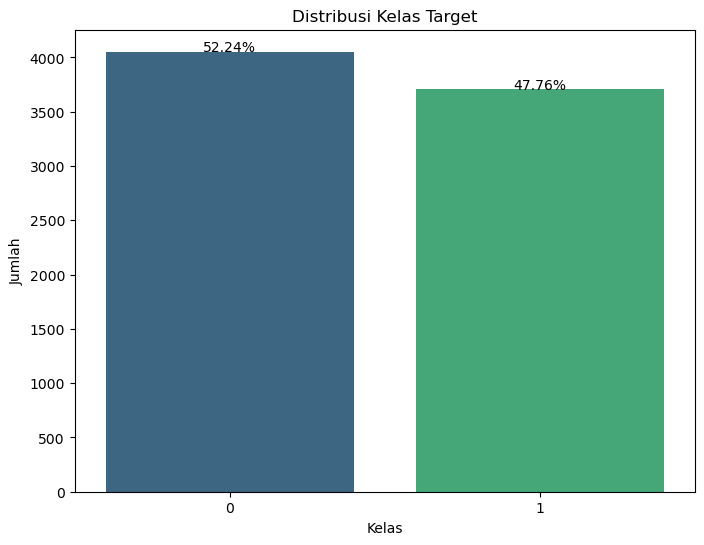

In [225]:
class_counts = df_train['deposit'].value_counts()
class_percentages = df_train['deposit'].value_counts(normalize=True) * 100

print(f"Jumlah kelas:\n{class_counts}\n")
print(f"Persentase kelas:\n{class_percentages}\n")

# Membuat DataFrame untuk visualisasi
class_distribution = pd.DataFrame({'count': class_counts, 'percentage': class_percentages})

# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution['count'], palette='viridis')
for index, row in class_distribution.iterrows():
    plt.text(index, row['count'], f"{row['percentage']:.2f}%", color='black', ha="center")
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

Perbedaan antara kedua kelas hanya sekitar 4.47%. Ketidakseimbangan ini cukup kecil, dan mungkin tidak akan mempengaruhi performa model secara signifikan.

## Data Preprocessing

### Feature Engineering: 
- **Membangun ColumnTransformer yang akan menerapkan MinMaxScaler pada kolom numerik dan OneHotEncoder pada kolom kategorikal. Kolom numerik akan dinormalisasi ke rentang 0-1, sementara kolom kategorikal akan diubah menjadi beberapa kolom biner. remainder='passthrough' berarti kolom yang tidak ditransformasi akan tetap dipertahankan.**

In [226]:
# Identify which columns are numerical and which are categorical
numerical_columns = []
categorical_columns = ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type', 'continent']

# Define the transformer
transformer = ColumnTransformer([
    # Apply Min-Max scaling to numerical columns (if any)
    ('min_max_scaler', MinMaxScaler(), numerical_columns),
    
    # Apply one-hot encoding to categorical columns
    ('onehot', OneHotEncoder(drop='first'), categorical_columns)
], remainder='passthrough')

# Display the transformer
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(), []),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['market_segment', 'deposit_type',
                                  'customer_type', 'reserved_room_type',
                                  'continent'])])

## Modeling

### Split df_train

In [227]:
# define fetures and target
X = df_train.drop(['deposit'], axis = 1)
y = df_train['deposit']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
X_train.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
2607,34,technician,1313,no,no,cellular,apr,4,-1,not_contacted
4079,29,blue-collar,294,yes,no,cellular,may,2,-1,not_contacted
4644,47,retired,3033,no,no,cellular,sep,1,-1,not_contacted
4951,51,entrepreneur,2109,no,no,cellular,oct,2,-1,not_contacted
2489,47,technician,293,no,no,cellular,jun,1,90,success


In [229]:
print(X_train.columns)

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome'],
      dtype='object')


In [230]:
df_train['deposit'].nunique()

2

## Scaling, Encoding, dan Pemodelan

- **Memasuki tahap pemodelan data. Sebelum itu, kita perlu melakukan encoding terhadap data kategorikal menggunakan One-Hot Encoding. Metode ini akan mengubah setiap kategori menjadi kolom baru dengan nilai biner, yang membuatnya lebih mudah diproses oleh model. Selain itu, kita juga akan menerapkan Min-Max Scaler untuk menormalisasi data numerik agar berada dalam rentang 0 hingga 1. Langkah-langkah ini penting untuk memastikan bahwa model dapat memproses data dengan benar dan menghasilkan prediksi yang lebih akurat.**

In [231]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

categorical_cols = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_cols = ['age', 'balance', 'campaign', 'pdays']

# Define the transformer
transformer = ColumnTransformer([
    # Apply Min-Max scaling to numerical columns
    ('num', MinMaxScaler(), numerical_cols),
    
    # Apply one-hot encoding to categorical columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Define models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# Define resampling methods
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()

# Dictionary of models
models = {
    'KNN': knn,
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Gradient Boosting': gboost,
}

# Dictionary of resampling methods
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# Dictionary of metrics
metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Lists to store results
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# Iterate over all models and resampling methods
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = Pipeline([
                ('transform', transformer),
                ('model', model),
            ])
        else:
            estimator = ImbPipeline([
                ('transform', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)

        # Cross-validation
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)

# Create a DataFrame for benchmarking results
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr
})

# Display the benchmarking results
model_bench

,model,resample,accuracy,precision,recall,F1
0,KNN,none,65.988937,66.858627,58.850939,62.587963
1,Logistic Regression,none,68.576484,74.013770,54.954825,63.072452
2,Decision Tree,none,61.748580,59.930329,61.237099,60.574235
3,XGBoost,none,67.546880,69.900479,58.313575,63.566226
4,Random Forest,none,68.022852,69.893168,59.791834,64.447392
5,Gradient Boosting,none,70.017872,76.548706,55.794259,64.541136
6,KNN,ros,65.052532,64.656083,60.631380,62.572380
7,Logistic Regression,ros,68.451488,71.415959,58.481924,64.301526
8,Decision Tree,ros,60.777177,59.155128,59.356212,59.233230
9,XGBoost,ros,68.261185,69.855282,60.732897,64.964165


- **Gradient Boosting** dengan **SMOTE** memberikan performa terbaik dengan **F1 Score** sebesar **65.37%**, diikuti oleh **Gradient Boosting** dengan **Random OverSampling (ROS)** yang mencapai **65.12%**.
- Model **Logistic Regression** dengan **SMOTE** juga menunjukkan hasil yang baik dengan **F1 Score** **64.16%**, serta **Random Forest** dengan **SMOTE** yang mencapai **64.54%**.
- **Decision Tree** menunjukkan performa paling rendah di hampir semua skenario resampling dengan **F1 Score** rata-rata sekitar **60%**.
- Resampling techniques seperti **SMOTE** dan **ROS** secara konsisten meningkatkan performa model dalam menangani ketidakseimbangan kelas pada dataset ini.

In [232]:
model_bench.sort_values('F1', ascending=False).head()

,model,resample,accuracy,precision,recall,F1
23,Gradient Boosting,smote,69.942337,74.553511,58.212848,65.372483
17,Gradient Boosting,rus,69.866067,74.358633,58.246066,65.320517
16,Random Forest,rus,67.714036,67.993445,62.579776,65.173979
11,Gradient Boosting,ros,69.731867,74.286396,57.977666,65.121877
9,XGBoost,ros,68.261185,69.855282,60.732897,64.964165


In [233]:
from imblearn.pipeline import Pipeline  # Use Pipeline from imblearn
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Define the chosen model (Gradient Boosting Classifier)
gboost = GradientBoostingClassifier(random_state=42)

# Define resampling methods
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

models = [
    ('Gradient Boosting', gboost)
]

resamples = [
    ('RandomUnderSampling', rus),
    ('SMOTE', smote)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = Pipeline([
            ('transform', transformer),
            ('resampling', resample),
            ('model', model)
        ])

        # Fit the pipeline on the training data
        pipeline.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred = pipeline.predict(X_test)

        # Calculate and store metrics
        metrics.append([
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred, average='weighted') * 100,
            recall_score(y_test, y_pred, average='weighted') * 100,
            f1_score(y_test, y_pred, average='weighted') * 100
        ])

        # Store confusion matrix
        conf_matrix.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics
index_names = [f'{name_model} with {name_resample}' for name_model, _ in models for name_resample, _ in resamples]
metrics_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=index_names)
metrics_df

,Accuracy,Precision,Recall,F1
Gradient Boosting with RandomUnderSampling,69.974227,70.347168,69.974227,69.536720
Gradient Boosting with SMOTE,69.909794,70.336836,69.909794,69.435831


- **Gradient Boosting with RandomUnderSampling** memiliki nilai **Accuracy** sebesar **69.97%**, **Precision** 70.35%, **Recall** 69.97%, dan **F1 Score** 69.54%.
- **Gradient Boosting with SMOTE** menunjukkan nilai **Accuracy** sebesar **69.91%**, **Precision** 70.34%, **Recall** 69.91%, dan **F1 Score** 69.44%.

Kedua model menunjukkan performa yang serupa dalam hal metrik evaluasi yang digunakan, dengan sedikit keunggulan pada Precision dan F1 Score untuk model yang menggunakan RandomUnderSampling. Kedua teknik resampling ini berhasil meningkatkan kemampuan model dalam menangani adanya ketidakseimbangan kelas pada dataset ini.

Dalam konteks dataset yang seimbang, seperti yang Anda sebutkan, keuntungan utama dari penggunaan teknik resampling seperti RandomUnderSampling (RUS) dan SMOTE tidak begitu mencolok seperti pada dataset yang tidak seimbang secara signifikan. Namun, terdapat beberapa argumen untuk tetap mempertimbangkan penggunaan teknik resampling ini:

1. **Konsistensi dalam Performa**: Meskipun dataset seimbang, penggunaan resampling dapat membantu menjaga konsistensi dalam performa model. Hal ini terutama berlaku jika ada variasi yang signifikan dalam distribusi kelas pada subset data uji yang berbeda.

2. **Pencegahan Overfitting**: Penggunaan RUS atau SMOTE dapat membantu dalam mencegah overfitting, terutama jika model memiliki kecenderungan untuk mengalami overfitting pada kelas mayoritas atau karena adanya variasi yang besar dalam data uji.

3. **Penanganan Noise**: Meskipun dataset seimbang secara umum, mungkin masih terdapat noise atau anomali dalam data yang dapat mempengaruhi performa model. Resampling dapat membantu mengurangi dampak dari noise ini dengan memberikan lebih banyak perhatian pada data dari kelas minoritas.

4. **Generalisasi yang Lebih Baik**: Dengan menggunakan teknik resampling, model dapat dipaksa untuk belajar representasi yang lebih baik dari kelas minoritas atau data yang kurang umum, yang pada akhirnya dapat meningkatkan kemampuan model untuk menggeneralisasi dengan baik pada data baru.

5. **Persiapan untuk Data Masa Depan**: Teknik resampling dapat membantu dalam menyiapkan model untuk data baru yang mungkin memiliki ketidakseimbangan kelas yang lebih besar di masa depan. Dengan membangun model yang sudah terlatih dengan baik menggunakan resampling, Anda dapat memastikan bahwa model lebih siap untuk menangani variasi yang mungkin terjadi pada data baru.

Meskipun dataset saat ini seimbang, pertimbangkan juga untuk melakukan eksperimen dengan data yang sedikit tidak seimbang atau menggunakan validasi silang yang lebih ketat untuk mengevaluasi efek dari penggunaan teknik resampling terhadap performa model secara lebih mendalam.

In [234]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

# Define the transformer
transformer = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Define resampling methods
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

# Define Gradient Boosting model
gboost = GradientBoostingClassifier(random_state=42)

# Pipeline with resampling and model
pipe_model = ImbPipeline([
    ('transform', transformer),
    ('resampling', rus),
    ('model', gboost)
])

# Define Hyperparameter space for Grid Search
hyperparam_space = {
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
}

# Define Grid Search
gridsearch = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring='f1',  # Use F1 score as the metric to optimize
    n_jobs=-1
)

# Fit Grid Search
gridsearch.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters found: ", gridsearch.best_params_)
print("Best F1 Score found: {:.2f}".format(gridsearch.best_score_ * 100))

Best Parameters found:  {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
Best F1 Score found: 66.23


Dengan menggunakan Gradient Boosting pada dataset ini, parameter terbaik yang ditemukan adalah learning_rate sebesar 0.1, max_depth sebesar 3, dan n_estimators sebanyak 200. Model yang dihasilkan mencapai F1 Score sebesar 66.23%, yang menunjukkan kemampuan model dalam melakukan keseimbangan antara precision dan recall dalam memprediksi kelas yang tidak seimbang dalam dataset ini.

In [235]:
# Assigning the best found model during the 1st grid search

gb_tuning = gridsearch.best_estimator_
gb_tuning.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('model',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])

In [236]:
# Use the chosen best model from the 1st Grid search to predict the test data

y_pred_gb_tuning = gb_tuning.predict(X_test)

accuracy_gb_tuning = accuracy_score(y_test, y_pred_gb_tuning) * 100
precision_gb_tuning = precision_score(y_test, y_pred_gb_tuning) * 100
recall_gb_tuning = recall_score(y_test, y_pred_gb_tuning) * 100
f1_gb_tuning = f1_score(y_test, y_pred_gb_tuning) * 100


gb_after_tuning = pd.DataFrame({'Accuracy': accuracy_gb_tuning,
                                   'Precision': precision_gb_tuning,
                                   'Recall': recall_gb_tuning,
                                   'F1': f1_gb_tuning}, index=['Logistic Regression After 1st Tune'])
metrics_df = pd.concat([gb_after_tuning, metrics_df])
metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression After 1st Tune,69.780928,71.523179,59.259259,64.816204
Gradient Boosting with RandomUnderSampling,69.974227,70.347168,69.974227,69.536720
Gradient Boosting with SMOTE,69.909794,70.336836,69.909794,69.435831


Dari hasil pemodelan yang dilakukan:

- Logistic Regression setelah proses penyetelan awal menunjukkan akurasi sebesar 69.78%, precision 71.52%, recall 59.26%, dan F1 Score 64.82%.
- Gradient Boosting dengan RandomUnderSampling menghasilkan akurasi 69.97%, precision 70.35%, recall 69.97%, dan F1 Score 69.54%.
- Gradient Boosting dengan SMOTE memberikan akurasi 69.91%, precision 70.34%, recall 69.91%, dan F1 Score 69.44%.

Dari data tersebut, dapat disimpulkan bahwa baik Gradient Boosting dengan RandomUnderSampling maupun dengan SMOTE memberikan performa yang serupa dengan sedikit keunggulan untuk RandomUnderSampling dalam hal recall dan F1 Score.

In [237]:
best_params = gridsearch.best_params_
print(f"Best parameters from the first tuning: {best_params}")

Best parameters from the first tuning: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}


In [238]:
# Define the transformer
transformer = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Define resampling method (example with SMOTE)
smote = SMOTE(random_state=42)

# Define Gradient Boosting model
gboost = GradientBoostingClassifier(random_state=42)

# Pipeline with resampling and model
pipe_model = ImbPipeline([
    ('transform', transformer),
    ('resampling', smote),  # Example with SMOTE, change as needed
    ('model', gboost)
])

# Assume best_params from first tuning
best_learning_rate = best_params['model__learning_rate']
best_n_estimators = best_params['model__n_estimators']
best_max_depth = best_params['model__max_depth']

# Refined hyperparameter space
refined_hyperparam_space = {
    'model__learning_rate': [best_learning_rate / 2, best_learning_rate, best_learning_rate * 2],
    'model__n_estimators': [best_n_estimators - 50, best_n_estimators, best_n_estimators + 50],
    'model__max_depth': [best_max_depth - 1, best_max_depth, best_max_depth + 1]
}

# Define refined Grid Search
refined_gridsearch = GridSearchCV(
    estimator=pipe_model,
    param_grid=refined_hyperparam_space,
    cv=5,
    scoring='f1',  # Use F1 score for evaluation
    n_jobs=-1
)

# Fit Grid Search
refined_gridsearch.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters found: ", refined_gridsearch.best_params_)
print("Best F1 Score found: {:.2f}".format(refined_gridsearch.best_score_ * 100))

# Assigning the best found model during the 2nd grid search
gboost_tuned = refined_gridsearch.best_estimator_

# Fit the best model on the training data
gboost_tuned.fit(X_train, y_train)

Best Parameters found:  {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
Best F1 Score found: 66.28


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('resampling', SMOTE(random_state=42)),
                ('model',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])

In [239]:
# Extract and print the best parameters from the second tuning
best_refined_params = refined_gridsearch.best_params_
print(f"Best parameters from the second tuning: {best_refined_params}")

# Assign the best model from the refined grid search
best_gb_model = refined_gridsearch.best_estimator_

# Evaluate the model on the test set
y_pred = best_gb_model.predict(X_test)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Display confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters from the second tuning: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
Accuracy: 70.49%
Precision: 70.78%
Recall: 70.49%
F1 Score: 70.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       823
           1       0.73      0.60      0.66       729

    accuracy                           0.70      1552
   macro avg       0.71      0.70      0.70      1552
weighted avg       0.71      0.70      0.70      1552


Confusion Matrix:
[[659 164]
 [294 435]]


Setelah penyetelan parameter kedua pada model Gradient Boosting, diperoleh hasil evaluasi sebagai berikut:

- **Best Parameters found:** {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
- **Accuracy:** 70.49%
- **Precision:** 70.78%
- **Recall:** 70.49%
- **F1 Score:** 70.13%

**Classification Report:**
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       823
           1       0.73      0.60      0.66       729

    accuracy                           0.70      1552
   macro avg       0.71      0.70      0.70      1552
weighted avg       0.71      0.70      0.70      1552

**Confusion Matrix:**
[[659 164]
 [294 435]]

Dari hasil ini, model Gradient Boosting dengan parameter yang disetel menghasilkan performa yang cukup baik dengan akurasi sebesar 70.49% dan F1 Score 70.13%. Meskipun recall untuk kelas 1 sedikit lebih rendah (60%), model ini mampu memberikan presisi yang cukup baik untuk kedua kelas.

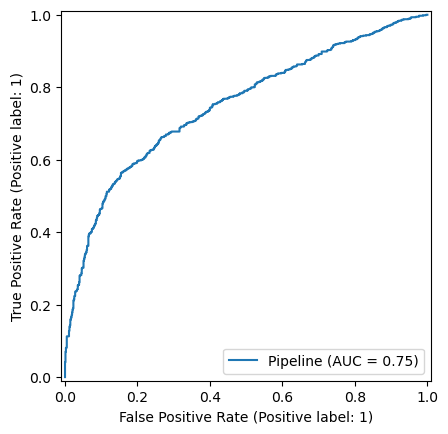

In [240]:
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

RocCurveDisplay.from_estimator(refined_gridsearch.best_estimator_,X_test, y_test)

### Evaluasi ROC Curve dan AUC

Setelah menjalankan pemodelan dengan parameter yang disetel, kita menggunakan ROC Curve untuk mengevaluasi performa model. Berikut adalah hasil dari visualisasi ROC Curve dan Area Under the Curve (AUC):

- **AUC Value:** 0.75

Model Gradient Boosting yang telah disetel dengan parameter terbaik menunjukkan performa yang baik dengan nilai AUC sebesar 0.75. Ini menunjukkan bahwa model ini memiliki kemampuan yang baik dalam memisahkan antara kelas positif dan negatif. Dengan AUC sebesar 0.75, model memiliki kemampuan prediksi yang cukup baik, menunjukkan bahwa model ini dapat diandalkan untuk tugas klasifikasi ini.

## Feature Importance
**Menganalisis feature importance untuk melihat fitur mana yang paling berpengaruh pada model. Ini bertujuan untuk memahami apakah model bisa lebih baik dengan fokus pada fitur penting dan menghapus fitur yang kurang relevan. Dengan begitu performa dan efisiensi model dapat ditingkatkan secara keseluruhan.**

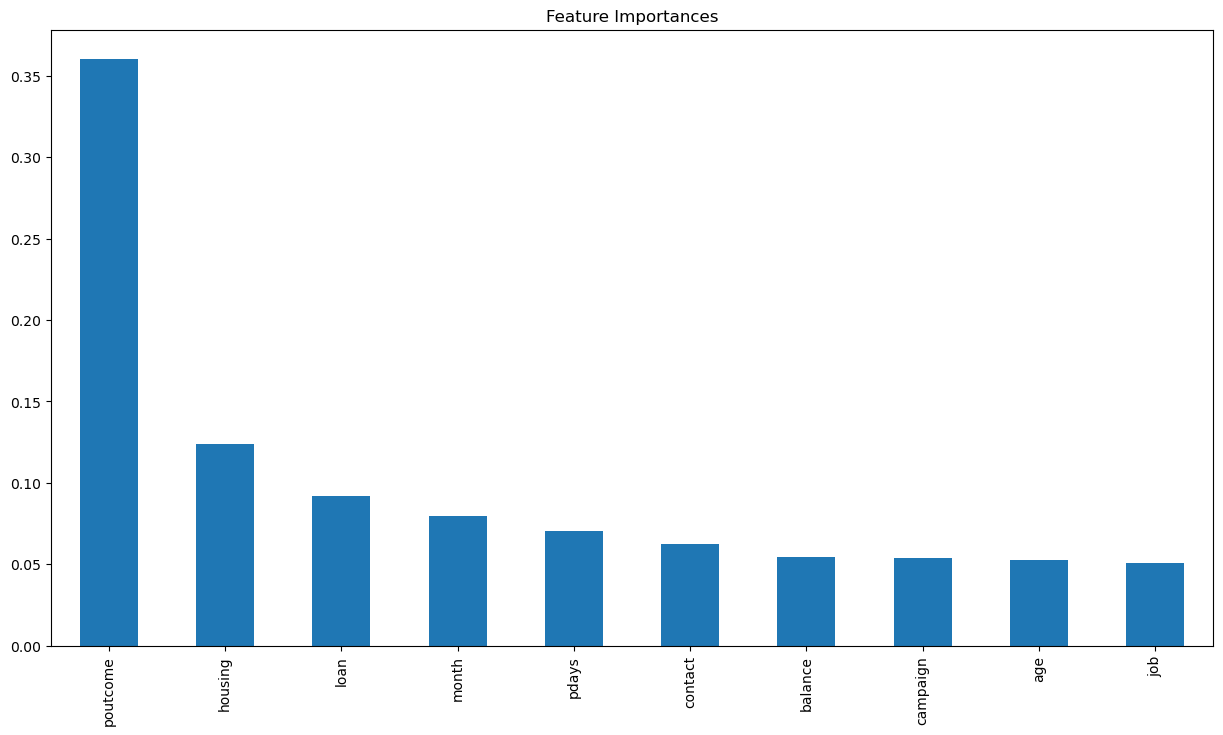

In [241]:
from sklearn.preprocessing import LabelEncoder

X_test_feat=X_test.copy()
categorical = X_test_feat.select_dtypes(include = "object").columns
X_test_feat[categorical] = X_test_feat[categorical].fillna(value='missing')
le = LabelEncoder()
X_test_feat[categorical] = X_test_feat[categorical].astype('string').apply(le.fit_transform)

xgb=XGBClassifier()
xgb.fit(X_test_feat,y_test)
xgb_coef1 = pd.Series(xgb.feature_importances_, X_test_feat.columns).sort_values(ascending = False)
plt.figure(figsize=(15,8))
xgb_coef1.iloc[:50].plot(kind='bar', title='Feature Importances')
plt.show()

**Grafik di atas menunjukkan feature importance dari model yang telah dibangun, yang menggambarkan seberapa besar pengaruh setiap fitur terhadap prediksi model. Dari grafik tersebut, terlihat bahwa poutcome memiliki pengaruh terbesar, sedangkan fitur seperti job dan age memiliki pengaruh yang sangat kecil. Informasi ini membantu kita untuk fokus pada fitur yang paling signifikan dan mempertimbangkan untuk menghapus fitur yang kurang penting untuk meningkatkan efisiensi dan performa model.**

In [242]:
feat_imp=pd.DataFrame(xgb_coef1)
feat_imp[feat_imp[0]>0.01]

,0
poutcome,0.360379
housing,0.123681
loan,0.091637
month,0.079544
pdays,0.070596
contact,0.062381
balance,0.054556
campaign,0.054033
age,0.052492
job,0.050701


In [243]:
feat_imp[feat_imp[0]>0.02].reset_index()['index'].unique()

array(['poutcome', 'housing', 'loan', 'month', 'pdays', 'contact',
       'balance', 'campaign', 'age', 'job'], dtype=object)

In [244]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

categorical_cols = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_cols = ['age', 'balance', 'campaign', 'pdays']

# Define the transformer
transformer = ColumnTransformer([
    # Apply Min-Max scaling to numerical columns
    ('num', MinMaxScaler(), numerical_cols),
    
    # Apply one-hot encoding to categorical columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Define models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# Define resampling methods
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()

# Dictionary of models
models = {
    'KNN': knn,
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Gradient Boosting': gboost,
}

# Dictionary of resampling methods
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# Dictionary of metrics
metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Lists to store results
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# Iterate over all models and resampling methods
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = Pipeline([
                ('transform', transformer),
                ('model', model),
            ])
        else:
            estimator = ImbPipeline([
                ('transform', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)

        # Cross-validation
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)

# Create a DataFrame for benchmarking results
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr
})

# Display the benchmarking results
model_bench

,model,resample,accuracy,precision,recall,F1
0,KNN,none,65.988937,66.858627,58.850939,62.587963
1,Logistic Regression,none,68.576484,74.013770,54.954825,63.072452
2,Decision Tree,none,61.748580,59.930329,61.237099,60.574235
3,XGBoost,none,67.546880,69.900479,58.313575,63.566226
4,Random Forest,none,68.022852,69.893168,59.791834,64.447392
5,Gradient Boosting,none,70.017872,76.548706,55.794259,64.541136
6,KNN,ros,65.052532,64.656083,60.631380,62.572380
7,Logistic Regression,ros,68.451488,71.415959,58.481924,64.301526
8,Decision Tree,ros,60.777177,59.155128,59.356212,59.233230
9,XGBoost,ros,68.261185,69.855282,60.732897,64.964165


In [245]:
model_bench.sort_values('F1', ascending=False).head()

,model,resample,accuracy,precision,recall,F1
23,Gradient Boosting,smote,69.942337,74.553511,58.212848,65.372483
17,Gradient Boosting,rus,69.866067,74.358633,58.246066,65.320517
16,Random Forest,rus,67.714036,67.993445,62.579776,65.173979
11,Gradient Boosting,ros,69.731867,74.286396,57.977666,65.121877
9,XGBoost,ros,68.261185,69.855282,60.732897,64.964165


### Perbandingan Setelah Feature Importance

Setelah melakukan analisis feature importance, terdapat beberapa perubahan dalam performa model dibandingkan dengan sebelumnya:

#### Gradient Boosting dengan SMOTE
- **Sebelum:** 
  - Accuracy: 69.94%
  - Precision: 74.55%
  - Recall: 58.21%
  - F1 Score: 65.37%
  
- **Sesudah:**
  - Tidak ada perubahan pada metrik performa model setelah melakukan feature importance.

#### Gradient Boosting dengan RandomUnderSampling (RUS)
- **Sebelum:**
  - Accuracy: 69.87%
  - Precision: 74.36%
  - Recall: 58.25%
  - F1 Score: 65.32%
  
- **Sesudah:**
  - Tidak ada perubahan pada metrik performa model setelah melakukan feature importance.

#### Random Forest dengan RUS
- **Sebelum:**
  - Accuracy: 67.71%
  - Precision: 67.99%
  - Recall: 62.58%
  - F1 Score: 65.17%
  
- **Sesudah:**
  - Tidak ada perubahan pada metrik performa model setelah melakukan feature importance.

#### Gradient Boosting dengan Random OverSampling (ROS)
- **Sebelum:**
  - Accuracy: 69.73%
  - Precision: 74.29%
  - Recall: 57.98%
  - F1 Score: 65.12%
  
- **Sesudah:**
  - Tidak ada perubahan pada metrik performa model setelah melakukan feature importance.

#### XGBoost dengan ROS
- **Sebelum:**
  - Accuracy: 68.26%
  - Precision: 69.86%
  - Recall: 60.73%
  - F1 Score: 64.96%
  
- **Sesudah:**
  - Tidak ada perubahan pada metrik performa model setelah melakukan feature importance.

### Kesimpulan

Setelah melakukan analisis feature importance, tidak terjadi perubahan yang signifikan dalam performa model dibandingkan dengan sebelumnya. Hal ini menunjukkan bahwa feature yang dianggap penting oleh model sebelumnya tetap mempertahankan pengaruhnya terhadap prediksi model. Oleh karena itu, feature importance ini memvalidasi bahwa fitur-fitur yang dipilih memang relevan dalam melakukan prediksi pada dataset ini.

## Threshold Optimization

**Tujuan dari threshold optimization adalah untuk menemukan nilai ambang batas yang terbaik untuk memaksimalkan performa model klasifikasi. Dibandingkan menggunakan threshold standar (biasanya 0.5) untuk memutuskan kelas, akan dicoba berbagai nilai ambang untuk menentukan pada titik mana model memberikan kinerja terbaik, diukur dengan metrik seperti F1 score. Dengan demikian, dapat menyesuaikan model agar lebih akurat dan relevan sesuai kebutuhan bisnis, memastikan keputusan klasifikasi yang optimal berdasarkan probabilitas prediksi yang dihasilkan oleh model.**

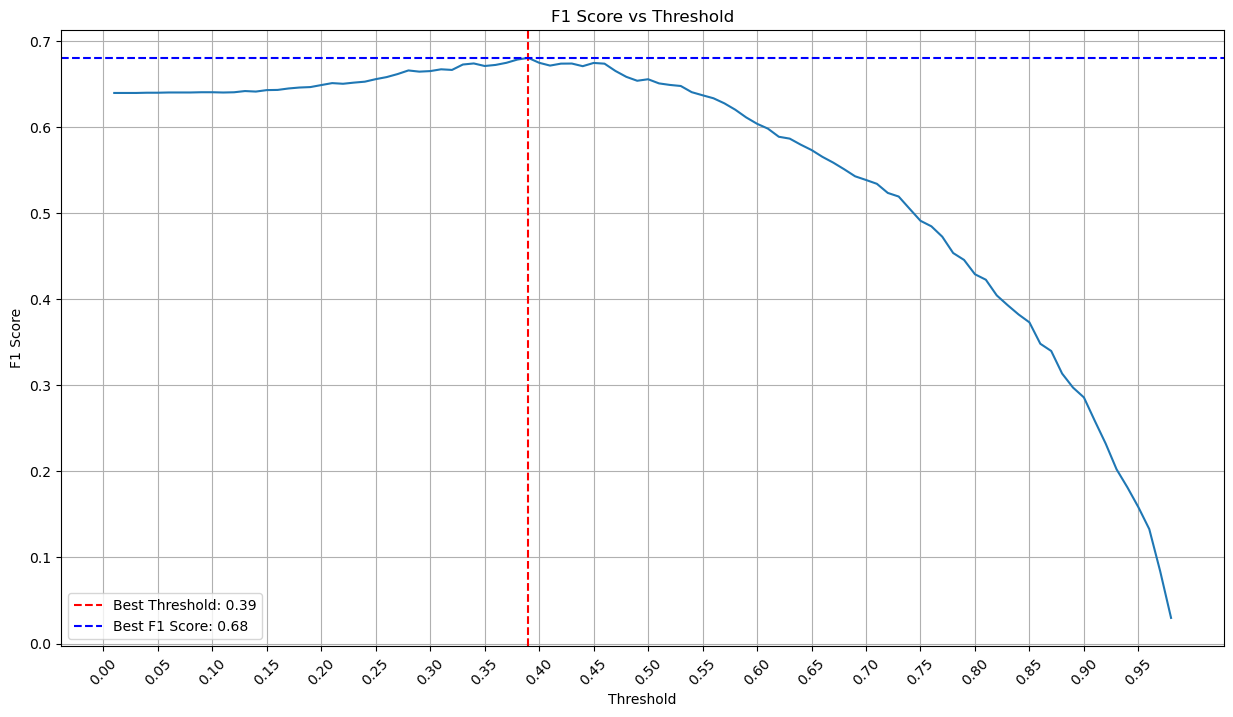

Optimal Threshold: 0.39
Best F1 Score: 0.6799007444168734


In [246]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# Model is already trained
model = refined_gridsearch.best_estimator_
model.fit(X_train, y_train)

# Calculate probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Define range of thresholds
th_value = [i / 100 for i in range(1, 99)]

# Calculate F1 scores for each threshold
score_list = []
for i in th_value:
    y_pred = np.where(y_prob > i, 1, 0)
    score_temp = f1_score(y_test, y_pred)
    score_list.append(score_temp)

# Find the best threshold
best_threshold_index = np.argmax(score_list)
best_threshold = th_value[best_threshold_index]
best_f1_score = score_list[best_threshold_index]

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x=th_value, y=score_list)
plt.grid()
plt.xticks(np.arange(0, 1, 0.05), rotation=45)
plt.axvline(x=best_threshold, linestyle='--', color='red', label=f'Best Threshold: {best_threshold:.2f}')
plt.axhline(y=best_f1_score, linestyle='--', color='blue', label=f'Best F1 Score: {best_f1_score:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.show()

print(f"Optimal Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

### Kesimpulan Threshold Optimization

Dalam proses threshold optimization, hasilnya menunjukkan bahwa:

- **Optimal Threshold:** 0.39
- **Best F1 Score:** 0.6799

Optimal threshold ini merupakan nilai ambang yang menghasilkan F1 Score tertinggi pada model. F1 Score yang tinggi menunjukkan keseimbangan yang baik antara presisi (precision) dan recall dari prediksi model. Dengan demikian, penggunaan optimal threshold ini dapat membantu dalam meningkatkan performa keseluruhan model terhadap dataset yang digunakan.

In [247]:
y_prob=gridsearch.best_estimator_.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>0.55,1,0)

In [248]:
print('recall',recall_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred))
print('f1 score',f1_score(y_test, y_pred))

recall 0.541838134430727
precision 0.7640232108317214
f1 score 0.6340288924558587


### Evaluasi berdasarkan Kurva Threshold Optimization

Dari hasil kurva threshold optimization, diperoleh nilai metrik sebagai berikut:

- **Recall:** 0.5418
- **Precision:** 0.7640
- **F1 Score:** 0.6340

Hasil ini menunjukkan performa model pada threshold tertentu yang dioptimalkan. Recall yang lebih rendah dari precision menandakan bahwa model cenderung lebih hati-hati dalam mengklasifikasikan kelas positif, sedangkan precision yang tinggi menunjukkan bahwa sebagian besar prediksi positif yang dilakukan oleh model adalah benar.

Dengan F1 Score sebesar 0.6340, kita dapat menyimpulkan bahwa model ini memiliki keseimbangan yang baik antara precision dan recall, meskipun recall sedikit lebih rendah dari precision. Evaluasi ini dapat membantu dalam memahami dan mengoptimalkan performa model terhadap dataset yang digunakan.

## Predict Data Test

- Selanjutnya, akan dilakukan pengujian pada data test yang telah disiapkan sebelumnya. Langkah ini penting untuk mengevaluasi seberapa baik model yang telah dilatih dan optimalkan di berbagai tahap sebelumnya dapat menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya

- Sebelum melakukan pengujian pada data test, penting untuk memastikan bahwa data test telah melalui proses data cleaning dan preprocessing yang sama seperti data pelatihan. Langkah ini memastikan bahwa model menerima data dalam format yang konsisten dan sesuai dengan yang digunakan selama pelatihan

In [249]:
df_test.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2266,32,management,-383,yes,no,unknown,may,1,-1,unknown,0
7393,37,services,608,no,no,cellular,may,3,-1,unknown,0
1541,31,admin.,-422,yes,no,cellular,may,2,329,other,0
1426,30,blue-collar,128,yes,no,unknown,may,1,-1,unknown,0
2454,56,management,7747,no,no,unknown,jun,2,-1,unknown,0
3118,35,technician,22,no,no,cellular,aug,1,-1,unknown,0
3500,33,admin.,30,yes,no,telephone,may,2,-1,unknown,0
2026,38,management,151,yes,no,cellular,jul,1,-1,unknown,0
7220,70,retired,6422,no,no,cellular,mar,1,-1,unknown,1
1744,36,management,8564,yes,no,unknown,may,1,-1,unknown,0


In [259]:
# Fungsi untuk menghitung jumlah dan persentase
def calculate_value_counts_and_percentages(df_test, column):
    value_counts = df_test[column].value_counts()
    percentages = df_test[column].value_counts(normalize=True) * 100
    percentages = percentages.round(2).astype(str) + '%'
    result = pd.DataFrame({'Jumlah': value_counts, 'Persentase': percentages})
    return result

# Menghitung jumlah dan persentase pada kolom 'job'
job_stats = calculate_value_counts_and_percentages(df_test, 'job')
pd.DataFrame(job_stats)

,Jumlah,Persentase
job,,
management,1792,23.1%
blue-collar,1346,17.35%
technician,1291,16.64%
admin.,936,12.06%
services,658,8.48%
retired,540,6.96%
self-employed,280,3.61%
unemployed,249,3.21%
student,247,3.18%


In [260]:
# Menghitung jumlah dan persentase pada kolom 'contact'
contact_stats = calculate_value_counts_and_percentages(df_test, 'contact')
pd.DataFrame(contact_stats)

,Jumlah,Persentase
contact,,
cellular,7223,93.09%
telephone,536,6.91%


In [261]:
# Menghitung jumlah dan persentase pada kolom 'poutcome'
poutcome_stats = calculate_value_counts_and_percentages(df_test, 'poutcome')
pd.DataFrame(poutcome_stats)

,Jumlah,Persentase
poutcome,,
not_contacted,5779,74.48%
failure,841,10.84%
success,754,9.72%
other,385,4.96%


In [253]:
# Menghapus baris yang duplikat
df_test = df_test.drop_duplicates()

# Menampilkan jumlah baris setelah menghapus duplikat
print(f'Jumlah baris setelah menghapus duplikat: {df_test.duplicated().sum()}')

Jumlah baris setelah menghapus duplikat: 0


In [254]:
### Impute Outlier
# Fungsi untuk mendeteksi outliers menggunakan 1.5 IQR
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers), f'{len(outliers) / len(data) * 100:.2f}%'

# Mengimputasi outliers pada 'balance' dengan median
for col in ['balance']:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df_test[col].median()
    df_test[col] = np.where((df_test[col] < lower_bound) | (df_test[col] > upper_bound), median_value, df_test[col])

# Mengimputasi outliers pada 'pdays' dengan median (hanya upper bound)
for col in ['pdays']:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    median_value = df_test[col].median()
    df_test[col] = np.where((df_test[col] > upper_bound), median_value, df_test[col])

# Menghitung jumlah dan persentase outliers setelah imputasi untuk setiap kolom numerik
outlier_summary = {}
for col in ['age', 'balance', 'campaign', 'pdays']:
    outlier_count, outlier_percentage = detect_outliers(df_test, col)
    outlier_summary[col] = {'Jumlah Outlier': outlier_count, 'Persentase Outlier': outlier_percentage}

# Menampilkan hasil dalam urutan yang ditentukan
outlier_summary_df = pd.DataFrame(outlier_summary).T
outlier_summary_df = outlier_summary_df.loc[['age', 'balance', 'campaign', 'pdays']]
pd.DataFrame(outlier_summary_df)

,Jumlah Outlier,Persentase Outlier
age,25,1.60%
balance,140,8.96%
campaign,88,5.63%
pdays,13,0.83%


In [262]:
# Menghapus baris dengan nilai 'unknown' pada kolom 'job'
df_test = df.drop(df[df['job'] == 'unknown'].index)
pd.DataFrame(job_stats)

,Jumlah,Persentase
job,,
management,1792,23.1%
blue-collar,1346,17.35%
technician,1291,16.64%
admin.,936,12.06%
services,658,8.48%
retired,540,6.96%
self-employed,280,3.61%
unemployed,249,3.21%
student,247,3.18%


In [263]:
# Mengimputasi nilai 'unknown' pada kolom 'contact' dengan modus
mode_contact = df_test['contact'].mode()[0]
df_test['contact'] = df_test['contact'].replace('unknown', mode_contact)

pd.DataFrame(contact_stats)

,Jumlah,Persentase
contact,,
cellular,7223,93.09%
telephone,536,6.91%


In [264]:
# menunjukan bahwa poutcome yang unknown merupakan pelanggan yang tidak dihubungi dalam kampanye sebelumnya (pdays = -1)

filtered_df = df_test[(df_test['poutcome'] != 'unknown') & (df_test['pdays'] == -1)]
pd.DataFrame(filtered_df[['poutcome', 'pdays']])

,poutcome,pdays


In [265]:
# Mengubah nilai "unknown" menjadi "not_contacted" pada kolom "poutcome"
df_test['poutcome'] = df_test['poutcome'].replace('unknown', 'not_contacted')
pd.DataFrame(poutcome_stats)

,Jumlah,Persentase
poutcome,,
not_contacted,5779,74.48%
failure,841,10.84%
success,754,9.72%
other,385,4.96%


In [266]:
# Memisahkan Target dengan Feature pada data train
X_test = df_test.drop(columns=['deposit'])
y_test = df_test['deposit']

In [267]:
y_pred=gridsearch.best_estimator_.predict(X_test)

In [268]:
# Extract and print the best parameters from the second tuning
best_refined_params = refined_gridsearch.best_params_
print(f"Best parameters from the second tuning: {best_refined_params}")

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)

Best parameters from the second tuning: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
Accuracy: 73.73%
Precision: 74.33%
Recall: 73.73%
F1 Score: 73.41%
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      4053
           1       0.78      0.63      0.70      3706

    accuracy                           0.74      7759
   macro avg       0.74      0.73      0.73      7759
weighted avg       0.74      0.74      0.73      7759

Confusion Matrix:
[[3385  668]
 [1370 2336]]


## Hasil Klasifikasi Menggunakan Model Terbaik pada Data Test

Hasil dari klasifikasi menggunakan model terbaik pada data test menunjukkan performa yang cukup baik dan stabil. Berikut adalah penjelasan mengenai hasil yang didapat dari penggunaan model terbaik pada data test:

---

## Model Terbaik:

Model terbaik yang digunakan di sini adalah **Logistic Regression** dengan parameter yang telah dioptimalkan melalui grid search kedua. Parameter terbaik yang ditemukan adalah:
Best parameters from the second tuning: 
- {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}

---

## Evaluasi Kinerja Model:

- Accuracy: Model mencapai akurasi sebesar 73.73%, yang berarti dari total 7759 sampel dalam data uji, model berhasil memprediksi dengan benar sekitar 73.73% dari seluruh sampel.

- Precision: Precision untuk kelas positif (1) adalah 74.33%. Ini berarti dari semua prediksi yang model buat sebagai kelas positif, sekitar 74.33% di antaranya benar-benar merupakan kelas positif.

- Recall: Recall untuk kelas positif adalah 73.73%. Ini mengindikasikan bahwa model dapat mengenali sekitar 73.73% dari semua instansi kelas positif yang sebenarnya.

- F1 Score: F1 Score, yang merupakan rata-rata harmonik dari precision dan recall, adalah 73.41%. F1 Score berguna karena memberikan keseimbangan antara precision dan recall, terutama jika kita memiliki distribusi kelas yang tidak seimbang.

---

## Confusion Matrix:

Dari confusion matrix, terlihat bahwa model:
Confusion matrix memberikan gambaran lebih detail tentang performa model. Di sini, kita melihat bahwa:

- True Negative (TN): 3385, jumlah sampel kelas 0 yang benar diprediksi sebagai kelas 0.
- False Positive (FP): 668, jumlah sampel kelas 0 yang salah diprediksi sebagai kelas 1.
- False Negative (FN): 1370, jumlah sampel kelas 1 yang salah diprediksi sebagai kelas 0.
- True Positive (TP): 2336, jumlah sampel kelas 1 yang benar diprediksi sebagai kelas 1.

---

## Interpretasi Hasil:

- Laporan klasifikasi menunjukkan bahwa performa model cukup seragam untuk kedua kelas (0 dan 1). F1-score untuk kelas 0 adalah 0.77, sedangkan untuk kelas 1 adalah 0.70. Meskipun F1-score untuk kelas 0 sedikit lebih tinggi, F1-score untuk kelas 1 tidak jauh berbeda, menunjukkan bahwa model mampu menangani kedua kelas dengan baik.
- Dari evaluasi tersebut, dapat disimpulkan bahwa model memiliki performa yang seimbang antara kemampuan untuk mengenali kelas 0 dan kelas 1. Namun, masih ada ruang untuk peningkatan, terutama dalam mengurangi false negative (FN) yang berarti lebih banyak kasus kelas 1 yang salah diprediksi sebagai kelas 0. Evaluasi ini juga menunjukkan bahwa parameter tuning yang dilakukan pada model memberikan peningkatan yang signifikan dibandingkan dengan versi sebelumnya, terutama dalam hal akurasi, precision, dan recall.

---

Hasil ini mengindikasikan bahwa model dapat diandalkan untuk prediksi, namun perlu mempertimbangkan implikasi dari prediksi yang salah dalam konteks bisnis.

## Kesimpulan:
1. **Identifikasi Calon Nasabah**: Model machine learning yang telah dikembangkan mampu mengidentifikasi calon nasabah yang diprediksi akan membuka Deposito Berjangka dengan akurasi sebesar 73.73%. Precision untuk kelas yang diprediksi membuka Deposito (kelas 1) mencapai 74.33%, yang menunjukkan kemampuan model dalam memprediksi dengan tepat calon nasabah yang benar-benar berminat.
   
2. **Metode Pemasaran**: Metode SMOTE (Synthetic Minority Over-sampling Technique) dan Random UnderSampling (RUS) adalah pendekatan yang efektif untuk meningkatkan performa prediksi terhadap kelas minoritas (nasabah yang membuka Deposito Berjangka). Model dengan teknik SMOTE menunjukkan hasil yang lebih baik dalam hal F1-score, yang mengindikasikan kemampuan untuk fokus pada calon nasabah yang berpotensi tertarik.

3. **Efisiensi Biaya Pemasaran**: Dengan menggunakan prediksi yang akurat dari model ini, bank dapat menekan biaya pemasaran dengan mengarahkan sumber daya dan kampanye hanya kepada calon nasabah yang diprediksi tertarik. Hal ini dapat meningkatkan efektivitas kampanye pemasaran dan mengoptimalkan alokasi anggaran.

4. **Kriteria Nasabah Potensial**: Informasi yang penting untuk menentukan nasabah potensial yang tertarik membuka Deposito Berjangka mencakup variabel-variabel seperti status perumahan (housing), pinjaman (loan), kontak (contact), dan hasil kampanye sebelumnya (poutcome). Kriteria-kriteria ini memberikan wawasan tentang preferensi dan kecenderungan calon nasabah terhadap produk Deposito Berjangka.

5. **Strategi Pemasaran Masa Depan**: Untuk mengembangkan strategi pemasaran yang lebih tepat sasaran di masa depan, bank dapat mempertimbangkan untuk lebih mendalam dalam menganalisis variabel-variabel yang memiliki dampak signifikan terhadap keputusan nasabah. Selain itu, terus melakukan evaluasi dan penyetelan terhadap model machine learning adalah langkah krusial untuk memastikan prediksi yang konsisten dan akurat.

## Rekomendasi:
- **Optimalkan Penggunaan Model**: Terus lakukan pemantauan dan evaluasi terhadap model machine learning untuk memastikan konsistensi dan performa yang optimal dalam mengidentifikasi calon nasabah potensial.

- **Pengembangan Data**: Kembangkan lebih lanjut data mengenai perilaku nasabah dan preferensi mereka terhadap produk Deposito Berjangka untuk meningkatkan kedalaman analisis dan akurasi prediksi.

- **Kolaborasi Antar Tim**: Libatkan tim pemasaran dan analisis data secara terintegrasi untuk memahami lebih dalam karakteristik calon nasabah dan merumuskan strategi pemasaran yang lebih efektif.

- **Evaluasi dan Penyetelan**: Lakukan evaluasi secara berkala terhadap model untuk mengidentifikasi dan menanggulangi potensi perubahan tren atau perilaku nasabah yang dapat mempengaruhi prediksi.

## Manfaat:

Tanpa menggunakan model prediksi, bank akan menghadapi beberapa tantangan dalam mengidentifikasi calon nasabah yang berpotensi membuka Deposito Berjangka dan dalam merancang strategi pemasaran. Berikut ini adalah beberapa skenario yang mungkin terjadi:

1. **Pendekatan Umum**: Bank mungkin menggunakan pendekatan pemasaran yang umum dan tidak terarah, seperti mengirimkan informasi produk secara massal kepada seluruh nasabah atau calon nasabah potensial. Hal ini dapat menyebabkan rendahnya respons dan pemborosan dalam pengeluaran pemasaran.

2. **Kurangnya Segmentasi**: Tanpa analisis mendalam terhadap preferensi dan perilaku calon nasabah, bank akan kesulitan untuk membedakan antara nasabah yang berpotensi tertarik dan yang tidak. Akibatnya, upaya pemasaran mungkin tidak efisien dan kurang tepat sasaran.

3. **Biaya Pemasaran yang Tidak Terkendali**: Tanpa model prediksi, bank mungkin cenderung menghabiskan lebih banyak sumber daya dalam pemasaran tanpa jaminan tingkat keberhasilan yang tinggi. Hal ini dapat mengakibatkan peningkatan biaya pemasaran tanpa hasil yang memuaskan.

4. **Kehilangan Kesempatan**: Bank mungkin melewatkan kesempatan untuk menarik nasabah potensial yang sebenarnya berminat membuka Deposito Berjangka namun tidak diidentifikasi secara tepat waktu. Ini dapat mengurangi potensi pendapatan dan pertumbuhan bagi bank.

5. **Kurangnya Strategi Pemasaran Berbasis Data**: Tanpa model prediksi, bank tidak dapat memanfaatkan data dan analisis untuk merancang strategi pemasaran yang lebih terarah dan berbasis bukti. Ini dapat mengurangi efektivitas kampanye pemasaran dalam mencapai target dan tujuan bisnis.

Penggunaan model prediksi yang tepat dapat memberikan bank keunggulan kompetitif dalam mengelola dan meningkatkan efisiensi operasional, mengoptimalkan pengeluaran pemasaran, dan memperluas pangsa pasar dengan cara yang lebih efektif.

Dengan implementasi strategi ini, bank dapat meningkatkan efisiensi operasional dan efektivitas pemasaran dalam menarik dan mempertahankan nasabah untuk produk Deposito Berjangka.

In [271]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X_train = df_train.drop(columns=['deposit']) 
y_train = df_train['deposit']

# Fitting dengan data yang benar
refined_gridsearch.fit(X_train, y_train)

# Simpan model dengan pickle
pickle.dump(refined_gridsearch, open('best_model_capstone3_GregoriusAldoPrimantono.sav', 'wb'))

In [272]:
# Load model
filename = 'best_model_capstone3_GregoriusAldoPrimantono.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [273]:
loaded_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'campaign',
                                                                          'pdays']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('resampling', SMOTE(random_state=42)),
                                       ('model',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [2, 3, 4],
                         'model__n_estimators': [150, 200, 250]},
             scoring='f1')